In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
from itertools import product
import sys,os
import time

import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append(os.path.abspath("/home/olya/SFU/Breast_cancer/DESMOND/"))

from find_optimal_parameters import *

%matplotlib inline

In [2]:
# and prefix of input file name
fname_prefix = "simulated.N=10.Mu=2.0.GxP="
# suffix idication overlap type
overlap = "TT"
# where are output files
out_dir = "../JbiclustGE/simulated_data/"

# sizes of biclusters
g_sizes = [5,10,20,50,100]
s_sizes = [10,20,50,100]

# true biclusters 
true_bic_dir = "../simulated_datasets/true_biclusters/"
true_bic_fname_prefix = fname_prefix
true_bic_fname_suffix = ".overlap="+overlap+".biclusters.txt"

In [3]:
# predicted biclusters 
tool_name = "COALESCE"
tool_suffix = "COALESCE"
n_runs = 10

parameters = (("prob_gene",[0.99, 0.95, 0.9]),
              ("pvalue_cond",[0.01, 0.05, 0.1]),
              ("pvalue_correl",[0.01, 0.05, 0.1]),
              ("zscore_cond",[0.01, 0.05, 0.1])) 

pred_bic_dir =  out_dir+tool_name+"/"
pred_bic_fname_prefix = fname_prefix
pred_bic_fname_suffix = ".overlap="+overlap

img_outdir = "../simulated_datasets/results/J/img"
tsv_outdir = "../simulated_datasets/results/J/"



In [4]:
for g in g_sizes:
    for s in s_sizes:
        params_folder = "prob_gene=0.9,pvalue_cond=0.1,pvalue_correl=0.1,zscore_cond=0.05"
        pred_bic_fname = pred_bic_fname_prefix+str(g)+","+str(s)+pred_bic_fname_suffix
        bic_file_path = pred_bic_dir+params_folder+"/" + pred_bic_fname
        bics = parse_JBiclustGE(bic_file_path,n_runs=n_runs)[0]
        print(g,s,len(bics))

5 10 0
5 20 6
5 50 10
5 100 12
10 10 1
10 20 10
10 50 10
10 100 12
20 10 4
20 20 10
20 50 10
20 100 11
50 10 10
50 20 10
50 50 12
50 100 11
100 10 10
100 20 10
100 50 14
100 100 22


In [5]:
n_genes = 20
n_samples = 50
true_bic_fname = true_bic_fname_prefix+str(n_genes)+","+str(n_samples)+true_bic_fname_suffix 
true_bics = read_true_bics(true_bic_dir+true_bic_fname)

params_folder = "prob_gene=0.99,pvalue_cond=0.05,pvalue_correl=0.05,zscore_cond=0.05"
pred_bic_fname = pred_bic_fname_prefix+str(n_genes)+","+str(n_samples)+pred_bic_fname_suffix
pred_bic_fname
bic_file_path = pred_bic_dir+params_folder+"/" + pred_bic_fname
bic_file_path 

'../JbiclustGE/simulated_data/COALESCE/prob_gene=0.99,pvalue_cond=0.05,pvalue_correl=0.05,zscore_cond=0.05/simulated.N=10.Mu=2.0.GxP=20,50.overlap=TT'

In [6]:
runs = parse_JBiclustGE(bic_file_path,n_runs=n_runs)
for i in range(0,n_runs):
    pred_bics = runs[i] 
    print(i, len(pred_bics),np.mean(F1_per_bic(true_bics, pred_bics)), np.mean(J_relevance(true_bics, pred_bics)) )


0 10 0.9990099009900991 0.9980392156862745
1 10 0.9990099009900991 0.9980392156862745
2 10 0.9990099009900991 0.9980392156862745
3 10 0.9990099009900991 0.9980392156862745
4 10 0.9990099009900991 0.9980392156862745
5 10 0.9990099009900991 0.9980392156862745
6 10 0.9990099009900991 0.9980392156862745
7 10 0.9990099009900991 0.9980392156862745
8 10 0.9990099009900991 0.9980392156862745
9 10 0.9990099009900991 0.9980392156862745


In [7]:
results= read_all_results(parameters,tool_name,n_runs=n_runs, parse_biclust_func=parse_JBiclustGE,
                          pred_bic_dir=pred_bic_dir,
                          pred_bic_fname_prefix=fname_prefix,
                          pred_bic_fname_suffix=pred_bic_fname_suffix,
                          true_bic_dir=true_bic_dir,
                          true_bic_fname_prefix=fname_prefix,
                          true_bic_fname_suffix=true_bic_fname_suffix,
                          param_folder_delim=",")
results_outfile =  tsv_outdir+ tool_suffix+".results.tsv"
results.to_csv(results_outfile ,sep="\t")
results.head(5)

Parameter combiations not found: 0
Successfull parameter combinations: 81
	files not found: 0
	files empty: 0
	failed to parse: 0
Total runs 16200
Non-zero runs: 13770


,n_genes,n_samples,zscore_cond,pvalue_cond,prob_gene,pvalue_correl,n_biclusters,Relevance,Recovery
0,5,10,0.01,0.01,0.99,0.01,10,0.0,0.0
1,5,10,0.01,0.01,0.99,0.01,10,0.0,0.0
2,5,10,0.01,0.01,0.99,0.01,10,0.0,0.0
3,5,10,0.01,0.01,0.99,0.01,10,0.0,0.0
4,5,10,0.01,0.01,0.99,0.01,10,0.0,0.0


In [8]:
parameters

(('prob_gene', [0.99, 0.95, 0.9]),
 ('pvalue_cond', [0.01, 0.05, 0.1]),
 ('pvalue_correl', [0.01, 0.05, 0.1]),
 ('zscore_cond', [0.01, 0.05, 0.1]))

Total combinations: 81
Total combinations: 81
[(0.95, 0.05, 0.1, 0.1) (0.95, 0.05, 0.1, 0.01) (0.95, 0.05, 0.1, 0.05)
 (0.95, 0.1, 0.1, 0.01) (0.95, 0.1, 0.1, 0.1) (0.95, 0.01, 0.1, 0.1)
 (0.95, 0.01, 0.1, 0.01) (0.9, 0.1, 0.1, 0.1) (0.9, 0.1, 0.1, 0.01)
 (0.95, 0.1, 0.1, 0.05) (0.9, 0.05, 0.1, 0.01) (0.9, 0.05, 0.1, 0.1)
 (0.9, 0.1, 0.1, 0.05) (0.9, 0.01, 0.1, 0.01) (0.9, 0.01, 0.1, 0.1)
 (0.9, 0.05, 0.1, 0.05) (0.95, 0.01, 0.1, 0.05) (0.99, 0.05, 0.1, 0.01)
 (0.99, 0.05, 0.1, 0.1) (0.99, 0.1, 0.1, 0.1)]
Top 20 paramter combinations


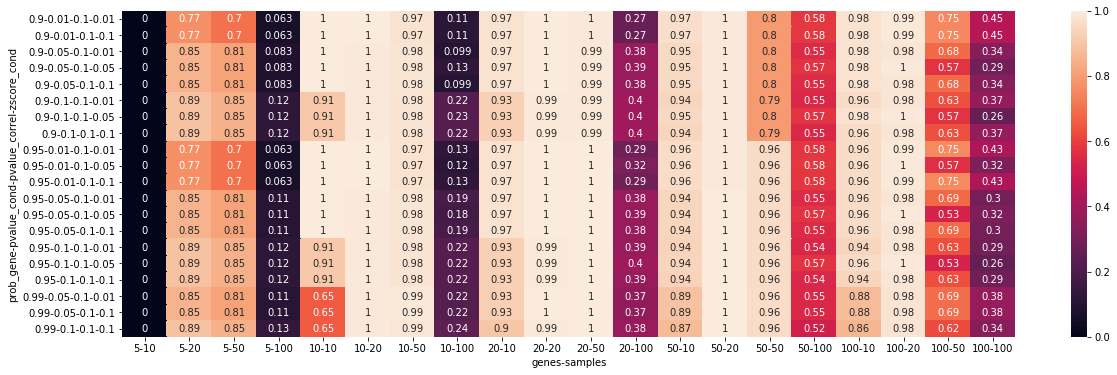

In [10]:
params = ["prob_gene","pvalue_cond","pvalue_correl","zscore_cond"]
plot_file = img_outdir+"/" + tool_suffix+".J_rel.heatmap.svg"
heatmap_outfile =  tsv_outdir+ tool_suffix+".J_rel.heatmap.tsv"

heatmap = plot_performance_heatmap(results,params,top=20,
                          g_sizes = [5,10,20,50,100], s_sizes = [10,20,50,100],
                          plot=True,plot_file=plot_file,outfile=heatmap_outfile)

In [11]:
parameters

(('prob_gene', [0.99, 0.95, 0.9]),
 ('pvalue_cond', [0.01, 0.05, 0.1]),
 ('pvalue_correl', [0.01, 0.05, 0.1]),
 ('zscore_cond', [0.01, 0.05, 0.1]))

In [12]:
default_params = (0.95,0.05,0.05,0.05)

In [18]:
r = get_opt_params(results, params, default_params=default_params, more_n_smaples = 0)
r

All 16200 runs considered

with Optimal parameters (Relevance --> max):
	prob_gene=0.95;
	pvalue_cond=0.05;
	pvalue_correl=0.1;
	zscore_cond=0.01;
	Max. avg. Relevance: 0.734 ± 0.338
	Max. avg. Recovery: 0.662 ± 0.346
	Max. avg. n_biclusters: 9.75 ± 3.231
With Default parameters:
	prob_gene=0.95;
	pvalue_cond=0.05;
	pvalue_correl=0.05;
	zscore_cond=0.05;
	avg. Relevance: 0.633 ± 0.39
	avg. Recovery: 0.63 ± 0.378
	avg. n_biclusters: 10.5 ± 2.208


Relevance                  \
                                                     mean       std count   
prob_gene pvalue_cond pvalue_correl zscore_cond                             
0.95      0.05        0.10          0.01         0.733682  0.338174   200   
                                    0.10         0.733682  0.338174   200   
                                    0.05         0.728167  0.340587   200   
          0.10        0.10          0.10         0.727543  0.331052   200   
                                    0.01         0.727543  0.331052   200   
          0.01        0.10          0.10         0.726543  0.344140   200   
                                    0.01         0.726543  0.344140   200   
0.90      0.10        0.10          0.01         0.725580  0.321774   200   
                                    0.10         0.725580  0.321774   200   
0.95      0.10        0.10          0.05         0.725210  0.335281   200   
0.90      0.05        0.10          0.01         0.722394  0.342776   200   
                                    0.10         0.722394  0.342776   200   
          0.10        0.10          0.05         0.720487  0.330225   200   
          0.01        0.10          0.10         0.718524  0.342760   200   
                                    0.01         0.718524  0.342760   200   
          0.05        0.10          0.05         0.717788  0.344600   200   
0.95      0.01        0.10          0.05         0.712730  0.350917   200   
0.99      0.05        0.10          0.01         0.712461  0.321196   200   
                                    0.10         0.712461  0.321196   200   
          0.10        0.10          0.10         0.709453  0.318762   200   
                                    0.01         0.709453  0.318762   200   
                                    0.05         0.706845  0.322372   200   
          0.05        0.10          0.05         0.702646  0.327273   200   
0.90      0.01        0.10          0.05         0.698825  0.355938   200   
0.99      0.01        0.10          0.01         0.698771  0.330005   200   
                                    0.10         0.698771  0.330005   200   
                                    0.05         0.689991  0.334224   200   
0.95      0.10        0.05          0.10         0.637432  0.388085   200   
                                    0.01         0.637432  0.388085   200   
                                    0.05         0.637111  0.389827   200   
...                                                   ...       ...   ...   
0.99      0.01        0.05          0.01         0.617414  0.385192   200   
                                    0.05         0.608909  0.387637   200   
0.90      0.01        0.05          0.05         0.603811  0.393299   200   
0.99      0.05        0.01          0.10         0.552692  0.418191   200   
                                    0.01         0.552692  0.418191   200   
0.95      0.10        0.01          0.05         0.552476  0.417661   200   
0.99      0.10        0.01          0.01         0.551624  0.417159   200   
                                    0.10         0.551624  0.417159   200   
0.95      0.05        0.01          0.01         0.550175  0.420241   200   
                                    0.10         0.550175  0.420241   200   
          0.10        0.01          0.10         0.550127  0.417532   200   
                                    0.01         0.550127  0.417532   200   
          0.05        0.01          0.05         0.547950  0.419843   200   
0.99      0.10        0.01          0.05         0.546063  0.418190   200   
0.95      0.01        0.01          0.10         0.545101  0.423842   200   
                                    0.01         0.545101  0.423842   200   
0.99      0.05        0.01          0.05         0.542440  0.419679   200   
          0.01        0.01          0.01         0.537030  0.422617   200   
                                    0.10    